<a href="https://colab.research.google.com/github/Brian-Onyango/Explainable-AI/blob/main/explainable_ai_hands_on_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.7 MB/s 


# Task 1

## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import shap
shap.initjs()
from collections import Counter
import seaborn as sns
%matplotlib inline
from statistics import mean
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv")

## Perform Basic Exploratory Data Analysis (EDA)

In [ ]:
df.head(5)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    914102        13.16         20.54           84.06      538.7   
1     91858        11.75         17.56           75.89      422.9   
2  88466802        10.65         25.22           68.01      347.0   
3   9111843        12.00         28.23           76.77      442.5   
4  84862001        16.13         20.68          108.10      798.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.07335           0.05275         0.01800              0.01256   
1          0.10730           0.09713         0.05282              0.04440   
2          0.09657           0.07234         0.02379              0.01615   
3          0.08437           0.06450         0.04055              0.01945   
4          0.11700           0.20220         0.17220              0.10280   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.1713  ...          28.46            95.29       648.3   
1         0.1598  ...          27.98            88.52       552.3   
2         0.1897  ...          35.19            77.98       455.7   
3         0.1615  ...          37.88            85.07       523.7   
4         0.2164  ...          31.48           136.80      1315.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1118             0.1646          0.07698               0.04195   
1            0.1349             0.1854          0.13660               0.10100   
2            0.1499             0.1398          0.11250               0.06136   
3            0.1208             0.1856          0.18110               0.07116   
4            0.1789             0.4233          0.47840               0.20730   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.2687                  0.07429          B  
1          0.2478                  0.07757          B  
2          0.3409                  0.08147          B  
3          0.2447                  0.08194          B  
4          0.3706                  0.11420          M  

[5 rows x 32 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       398 non-null    int64  
 1   radius_mean              398 non-null    float64
 2   texture_mean             398 non-null    float64
 3   perimeter_mean           398 non-null    float64
 4   area_mean                398 non-null    float64
 5   smoothness_mean          398 non-null    float64
 6   compactness_mean         398 non-null    float64
 7   concavity_mean           398 non-null    float64
 8   concave points_mean      398 non-null    float64
 9   symmetry_mean            398 non-null    float64
 10  fractal_dimension_mean   398 non-null    float64
 11  radius_se                398 non-null    float64
 12  texture_se               398 non-null    float64
 13  perimeter_se             398 non-null    float64
 14  area_se                  3

*   We have 398 rows and 32 columns
*   There are 3 different data - types in our dataset, namely, the float64, int64, and object datatypes 

In [ ]:
df.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

Great! We are in luck - there are no missing values in our dataset!

In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: int(x.upper() == 'M'))

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [ ]:
train, test = train_test_split(df, test_size = 0.2, random_state = 0, stratify = df['diagnosis'])

In [ ]:
train.head()

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
360    864726         8.95         15.76           58.74      245.2   
234  89143602        14.41         19.73           96.03      651.0   
64     911366        11.62         18.18           76.38      408.8   
153    891716        12.72         13.78           81.78      492.1   
309   8611792        19.10         26.29          129.10     1132.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
360          0.09462           0.12430         0.09263              0.02308   
234          0.08757           0.16760         0.13620              0.06602   
64           0.11750           0.14830         0.10200              0.05564   
153          0.09667           0.08393         0.01288              0.01924   
309          0.12150           0.17910         0.19370              0.14690   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
360         0.1305  ...          17.07            63.34       270.0   
234         0.1714  ...          22.13           101.70       767.3   
64          0.1957  ...          25.40            88.14       528.1   
153         0.1638  ...          17.48            88.54       553.7   
309         0.1634  ...          32.72           141.30      1298.0   

     smoothness_worst  compactness_worst  concavity_worst  \
360           0.11790             0.1879          0.15440   
234           0.09983             0.2472          0.22200   
64            0.17800             0.2878          0.31860   
153           0.12980             0.1472          0.05233   
309           0.13920             0.2817          0.24320   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
360               0.03846          0.1652                  0.07722          0  
234               0.10210          0.2272                  0.08799          0  
64                0.14160          0.2660                  0.09270          0  
153               0.06343          0.2369                  0.06922          0  
309               0.18410          0.2311                  0.09203          1  

[5 rows x 32 columns]

In [ ]:
X_train = train.iloc[:, :31].values
Y_train = train.iloc[:, 31:].values

X_test = test.iloc[:, :31].values
Y_test = test.iloc[:, 31:].values

In [ ]:
print("Processed DataFrame for Training : diagnosis is the Target, other columns are features.")
display(train.head())

Processed DataFrame for Training : diagnosis is the Target, other columns are features.


id  radius_mean  texture_mean  perimeter_mean  area_mean  \
360    864726         8.95         15.76           58.74      245.2   
234  89143602        14.41         19.73           96.03      651.0   
64     911366        11.62         18.18           76.38      408.8   
153    891716        12.72         13.78           81.78      492.1   
309   8611792        19.10         26.29          129.10     1132.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
360          0.09462           0.12430         0.09263              0.02308   
234          0.08757           0.16760         0.13620              0.06602   
64           0.11750           0.14830         0.10200              0.05564   
153          0.09667           0.08393         0.01288              0.01924   
309          0.12150           0.17910         0.19370              0.14690   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
360         0.1305  ...          17.07            63.34       270.0   
234         0.1714  ...          22.13           101.70       767.3   
64          0.1957  ...          25.40            88.14       528.1   
153         0.1638  ...          17.48            88.54       553.7   
309         0.1634  ...          32.72           141.30      1298.0   

     smoothness_worst  compactness_worst  concavity_worst  \
360           0.11790             0.1879          0.15440   
234           0.09983             0.2472          0.22200   
64            0.17800             0.2878          0.31860   
153           0.12980             0.1472          0.05233   
309           0.13920             0.2817          0.24320   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
360               0.03846          0.1652                  0.07722          0  
234               0.10210          0.2272                  0.08799          0  
64                0.14160          0.2660                  0.09270          0  
153               0.06343          0.2369                  0.06922          0  
309               0.18410          0.2311                  0.09203          1  

[5 rows x 32 columns]

# Task 2

## Use Random Forest Machine Learning Model for prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [ ]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
random_forest_preds = regressor.predict(X_test)

## Evaluate the model using Accuracy Score

In [ ]:
print('The accuracy of the Random Forests model is :\t', accuracy_score(random_forest_preds, Y_test))

# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [ ]:
# creating an explainer for our model
explainer = shap.TreeExplainer(regressor)

In [ ]:
# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

In [ ]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output
print('Expected Value:', explainer.expected_value)

Expected Value: [0.37122642]


In [ ]:
# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

0         1         2         3         4         5         6   \
0  0.001370  0.003930  0.009195  0.009402  0.032150  0.003815 -0.000250   
1 -0.000892  0.005690  0.008809  0.012982  0.039590  0.000781  0.000466   
2  0.002682  0.004118  0.008446  0.009338  0.032908 -0.001388  0.002614   
3 -0.001430 -0.003659  0.002178 -0.000282 -0.002001  0.000278 -0.000199   
4  0.009063 -0.005485  0.002056 -0.001633 -0.001744  0.001903 -0.000112   

         7         8         9   ...        21        22        23        24  \
0  0.003597  0.060549  0.000067  ...  0.083626  0.035579  0.128488  0.076886   
1  0.002336  0.054478  0.000559  ...  0.149670  0.007713  0.210923  0.118932   
2  0.001687  0.058551 -0.000368  ...  0.088219  0.014055  0.144234  0.082351   
3 -0.005629 -0.051226 -0.000270  ... -0.048617 -0.006074 -0.100970 -0.077457   
4 -0.009993 -0.050251 -0.000365  ... -0.051445 -0.011523 -0.108909 -0.092113   

         25        26        27        28        29        30  
0  0.002121  0.000112  0.006101  0.123246 -0.000620 -0.002365  
1 -0.000202  0.000150  0.005854 -0.000359 -0.000444 -0.002392  
2  0.000847  0.000354  0.004837  0.128700 -0.000662 -0.001694  
3 -0.003394 -0.000345 -0.016622 -0.043216 -0.001912 -0.001294  
4 -0.000641 -0.000057  0.002330 -0.017117 -0.001046 -0.000600  

[5 rows x 31 columns]

## Write your inferences from the generated plot.

This returns a matrix of SHAP values (# samples, # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer).

Typically this difference helps us in explaining why the model is inclined on predicting a specific class outcome. You'll see shap_values being used multiple times now.

Also, the Expected Value (0.37122642) being displayed above will be used as the base value throughout all the visualizations below. The values above this base value will be put into class 1 (malignant tumor :(), whereas the values below it will be put into class 0 (benign tumor :)).

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
Y_test[0]

array([1])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,
shap_values[0,:], X_test[0,:])

## Write your inferences from the generated plot.

SHAP gives a nice reasoning above showing which features were the most influential in the model, taking the correct decision of predicting the sample as one having a malignant tumor.

The explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the actual model output.

**Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.**

We can see all the features are displayed in red, i.e., all features contributed in making the income higher than the base value.

The final value (displayed in bold) is much higher than the base value. Thus, the sample is classified to be in the malignant category.

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
Y_test[:]

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1]])

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value,
shap_values[:,:], X_test[:,:])

## Write your inferences from the generated plot.

The above visualization can be interacted with in multiple ways. Try out the drop down boxes on both sides.

The default visualization(sample order by similarity i.e putting the people having the most similar features together) shows some interesting model prediction pattern decisions. You can hover over the graph to understand the following observations.

Definitely interesting how we can find out patterns which lead to the model making specific decisions and being able to provide explanations for them.

# Task 6

## Plot a SHAP summary plot using all the features in the data

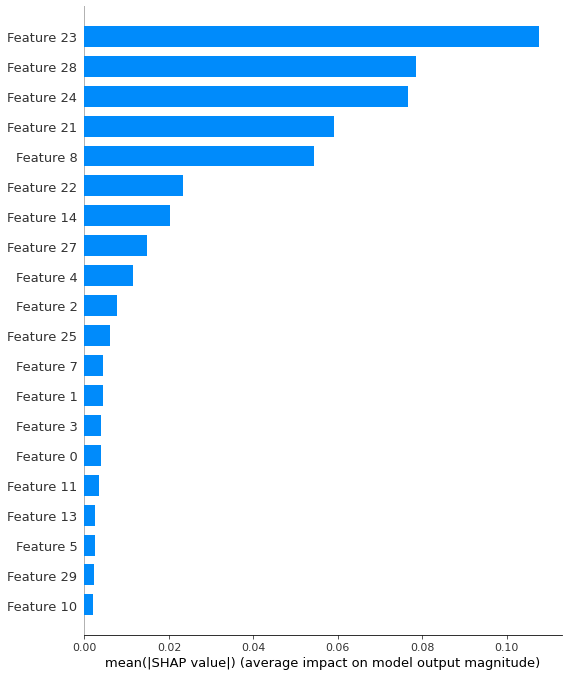

In [ ]:
shap.initjs()
shap.summary_plot(shap_values,
X_test, plot_type="bar")

## Write your inferences from the generated plot - Part I

From the above simple bar chart, we observe that perimeter_worst and concave points_worst are the top 2 important features while determining the type of tumor.

On the other hand, fractal_dimension_mean and symmetry_worst are the least important features while determining the type of tumor.

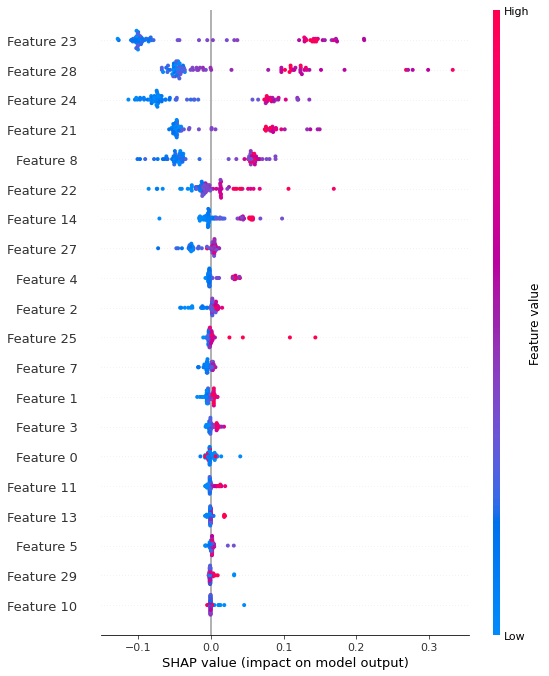

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

## Write your inferences from the generated plot - Part II

In the above plot, we have provided all the features in X_test to the Summary Plot. We can also provide some specific features instead.

# Task 7

##Plot a SHAP dependence plot using all features in the data

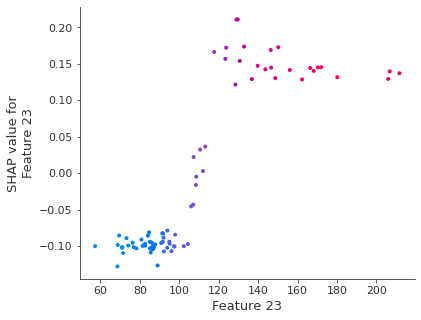

In [ ]:
shap.initjs()
shap.dependence_plot(ind='Feature 23', interaction_index='Feature 23',
shap_values=shap_values,
features=X_test)

## Inference 1

A **complex**, but **directly proportional**, distribution of perimeter_worst vs the probability of the sample having a malignant tumor.

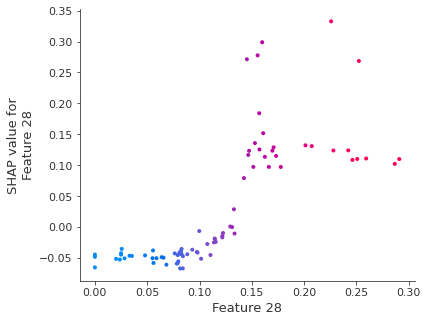

In [ ]:
shap.initjs()
shap.dependence_plot(ind='Feature 28', interaction_index='Feature 28',
shap_values=shap_values,
features=X_test)

## Inference 2

Again, a **complex** (this time **more continuous** than for perimeter_worst), but **directly proportional**, distribution of concave points_worst vs the probability of the sample having a malignant tumor.

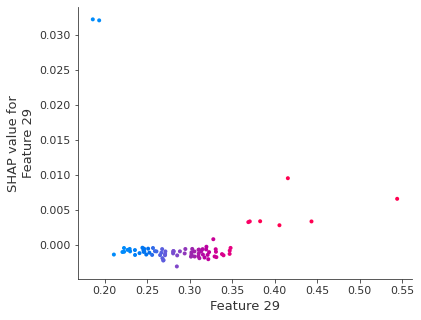

In [ ]:
shap.initjs()
shap.dependence_plot(ind='Feature 29', interaction_index='Feature 29',
shap_values=shap_values,
features=X_test)

## Inference 3

Except for a few outliers, the probability of the sample having a malignant tumor is **independent** of symmetry_worst.

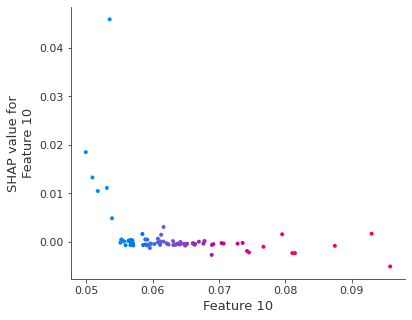

In [ ]:
shap.initjs()
shap.dependence_plot(ind='Feature 10', interaction_index='Feature 10',
shap_values=shap_values,
features=X_test)

## Inference 4

Ditto as above (albeit with a few more outliers), the probability of the sample having a malignant tumor being **independent** of fractal_dimension_mean this time around.

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

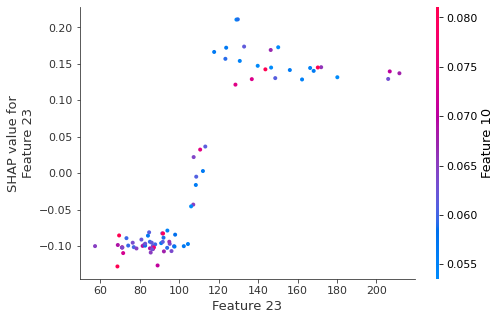

In [ ]:
shap.initjs()
shap.dependence_plot(ind='Feature 23', interaction_index='Feature 10',
shap_values=shap_values,
features=X_test)

As expected, the most important feature (perimeter_worst) quite outstandingly masks the effect of the least important one (fractal_dimension_mean). The resultant 2 - way PDP is, thus, almost reminiscent of the '1 - way' PDP of perimeter_worst vs the probability of the sample having a malignant tumor.  

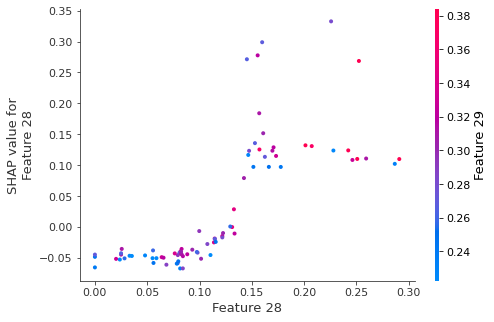

In [ ]:
shap.initjs()
shap.dependence_plot(ind='Feature 28', interaction_index='Feature 29',
shap_values=shap_values,
features=X_test)

Again, ditto from above.
 
However, the '**amount of dependence**' of the probability of the sample having a malignant tumor on concave points_worst **decreases slightly**, as is apparent from the higher density of red dots in the middle as compared to the earlier plot for Feature 28.